In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print('X Training shape: ',x_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',x_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


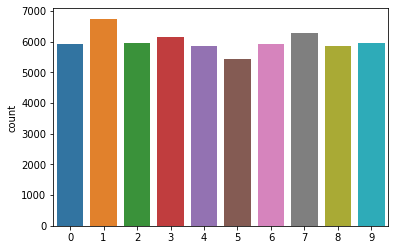

In [ ]:
sns.countplot(y_train)

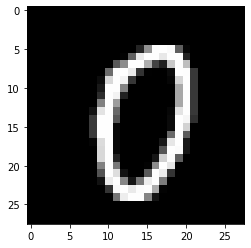

In [ ]:
plt.imshow(x_train[1000], cmap='gray')
plt.show()

In [ ]:
input_shape = (28,28,1)

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [ ]:
# plt.imshow(x_train[2], cmap='gray')
# plt.show()
batch_size = 128
num_classes = 10
epochs = 5

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(36, kernel_size=(3, 3), activation="tanh"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(72, kernel_size=(3, 3), activation="tanh"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 36)        360       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 36)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 36)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 72)        23400     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 72)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1800)             

In [ ]:
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 5s 11ms/step - loss: 0.4291 - accuracy: 0.8700 - val_loss: 0.1131 - val_accuracy: 0.9687
Epoch 2/5
422/422 [==============================] - 4s 10ms/step - loss: 0.1533 - accuracy: 0.9538 - val_loss: 0.0788 - val_accuracy: 0.9788
Epoch 3/5
422/422 [==============================] - 4s 10ms/step - loss: 0.1167 - accuracy: 0.9641 - val_loss: 0.0626 - val_accuracy: 0.9837
Epoch 4/5
422/422 [==============================] - 4s 10ms/step - loss: 0.1009 - accuracy: 0.9685 - val_loss: 0.0539 - val_accuracy: 0.9852
Epoch 5/5
422/422 [==============================] - 4s 10ms/step - loss: 0.0915 - accuracy: 0.9716 - val_loss: 0.0575 - val_accuracy: 0.9840


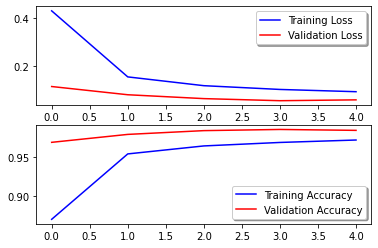

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0546 - accuracy: 0.9826


In [ ]:
Y_pred = model2.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

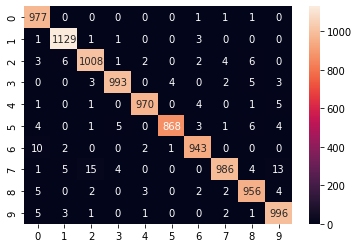

In [ ]:
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

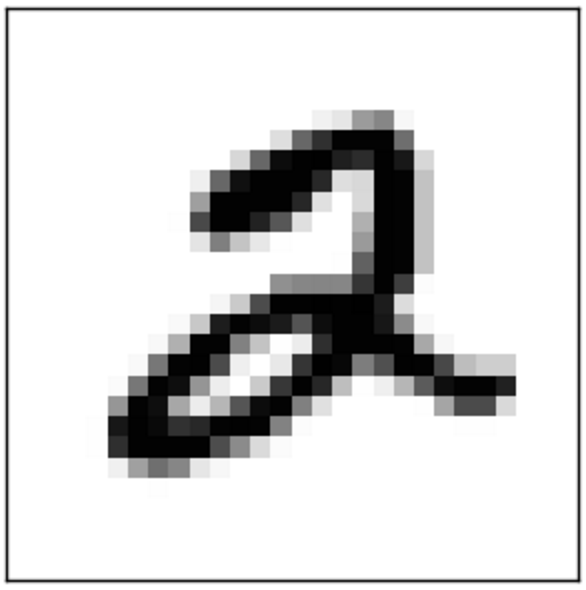

In [ ]:
img = io.imread('https://raw.githubusercontent.com/rohan-varma/rohan-blog/master/images/mnistimg.png')
cv2_imshow(img)

In [ ]:
img.shape

(590, 586, 4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [ ]:
gray.shape

In [ ]:
img_rs = cv.resize(gray, (28, 28))

In [ ]:
img_rs.shape

In [ ]:
cv2_imshow(img_rs)

In [ ]:
img_rs = np.expand_dims(img_rs,0)

In [ ]:
img_rs.shape

In [ ]:
img_rs = np.expand_dims(img_rs,-1)

In [ ]:
img_rs.shape

In [ ]:
num = model2.predict(img_rs)
num

In [ ]:
rs = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
from numpy.core.fromnumeric import argmax
result = rs[argmax(num)]

In [ ]:
result

In [ ]:
model.save('mnist.h5')

In [ ]:
model = load_model('mnist.h5')

In [ ]:
model.summary()